Multiple linear regression (MLR), also known as multiple regression, is a statistical technique that uses several features / variables to predict the outcome of a response variable. The goal of multiple linear regression (MLR) is to model the linear relationship between the explanatory (independent/X) variables and response (dependent/y) variable.


In [1]:
# importing relevant dependencies & libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import missingno as msno

%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
#path to data
houses = pd.read_csv('Resources/home_data.csv')

In [5]:
# inspecting houses file
houses.shape

(21613, 21)

In [6]:
#drop unwanted columns
houses.drop(["id","date","price","waterfront","view","yr_renovated","zipcode","sqft_lot15","sqft_living15"], axis=1)
cleanhouses=houses.drop(["id","date","price","waterfront","view","yr_renovated","zipcode","sqft_lot15","sqft_living15"], axis=1)#.head(20)
cleanhouses

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,lat,long
0,3,1.00,1180,5650.0,1.0,3,7,1180,0,1955,47.5112,-122.257
1,3,2.25,2570,7242.0,2.0,3,7,2170,400,1951,47.7210,-122.319
2,2,1.00,770,10000.0,1.0,3,6,770,0,1933,47.7379,-122.233
3,4,3.00,1960,5000.0,1.0,5,7,1050,910,1965,47.5208,-122.393
4,3,2.00,1680,8080.0,1.0,3,8,1680,0,1987,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131.0,3.0,3,8,1530,0,2009,47.6993,-122.346
21609,4,2.50,2310,5813.0,2.0,3,8,2310,0,2014,47.5107,-122.362
21610,2,0.75,1020,1350.0,2.0,3,7,1020,0,2009,47.5944,-122.299
21611,3,2.50,1600,2388.0,2.0,3,8,1600,0,2004,47.5345,-122.069


In [7]:
#define y
y_prices=houses["price"]
#y_prices.head()

Exploratory Data Analysis (EDA)

Performing an effective EDA can reveal insights about the data that can be used to help identify necessary data cleaning steps before testing and building a model.
One part of EDA is to determine whether there is a relationship between our specific features and our target, the home sale price.

Pandas' corrwith method will return a pair-wise correlation for each feature and the identified "target".

Using seaborn, we can visualize these pair-wise correlations. For ease of analysis, the code below sorts the pair-wise correlations by absolute value.

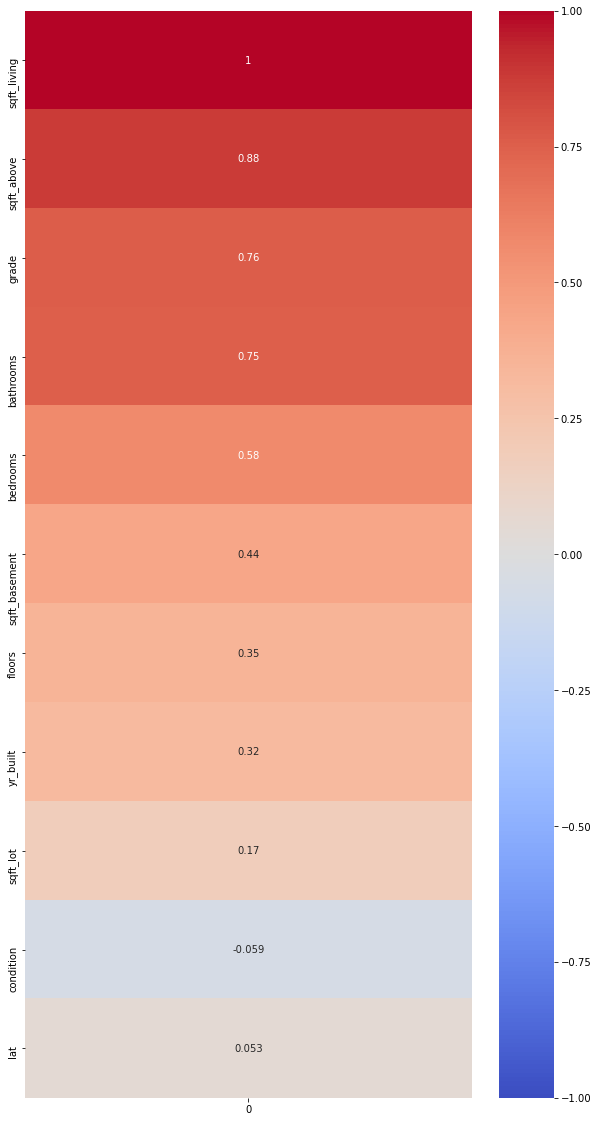

In [8]:
correlations = cleanhouses.corrwith(cleanhouses['sqft_living']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]

fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), \
            cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

In [9]:
# temp=model.predict(X_train_scaled)
# print(temp)

In [10]:
#Setting X and y variables for Linear Regression Model: 3 different Features, without sqft_living
X = cleanhouses 
y = houses['price'].values.reshape(-1,1)
print(X.shape, y.shape)

(21613, 12) (21613, 1)


In [11]:
# Use train_test_split to create training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [12]:
 # Create the model using LinearRegression
model = LinearRegression()

In [13]:
#scale the data (standard)
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [14]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [15]:
# Fit the model to the training data and calculate the scores for the training and testing data

model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6546443024078469
Testing Score: 0.6544972546075059


Text(0.5, 1.0, 'Residual Plot')

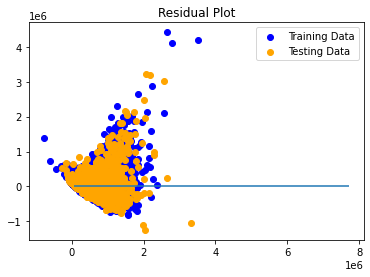

In [16]:
# Plot the Residuals for the Training and Testing data...due to complexity to plotting a line in a 3D space.
# Are the residuals propperly distributed? Should be close to 0 when averaged out. Evenly distributed above and below the line.


plt.scatter(model.predict(X_train_scaled), y_train - model.predict(X_train_scaled), c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), y_test - model.predict(X_test_scaled), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [25]:
import pickle
filename = "Trained_Models/katrice_MLR_model.h5"
pickle.dump(model, open(filename, 'wb'))

In [17]:
# # score the prediction - trained
# score = model.score(X_train_scaled, y_train)
# print(f"R2 Score: {score}")

In [18]:
# # score the prediction - test
# score = model.score(X_test_scaled, y_test)
# print(f"R2 Score: {score}")

Plot Original Data vs. Scaled Data

In [19]:
# #Bedrooms
# fig1 = plt.figure(figsize=(12, 6))
# axes1 = fig1.add_subplot(1, 2, 1)
# axes2 = fig1.add_subplot(1, 2, 2)

# axes1.set_title("Original Bedrooms")
# axes2.set_title("Scaled Bedrooms")

# maxx = X_train["bedrooms"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

# def set_axes(ax):
#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('center')
#     ax.spines['top'].set_color('none')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
# set_axes(axes1)
# set_axes(axes2)

# axes1.scatter(X_train["bedrooms"], y_train)
# axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [20]:
# #Bathrooms
# fig1 = plt.figure(figsize=(12, 6))
# axes1 = fig1.add_subplot(1, 2, 1)
# axes2 = fig1.add_subplot(1, 2, 2)

# axes1.set_title("Original Bathrooms")
# axes2.set_title("Scaled Bathrooms")

# maxx = X_train["bathrooms"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

# def set_axes(ax):
#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('center')
#     ax.spines['top'].set_color('none')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
# set_axes(axes1)
# set_axes(axes2)

# axes1.scatter(X_train["bathrooms"], y_train)
# axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

In [21]:
# #Condition
# fig1 = plt.figure(figsize=(12, 6))
# axes1 = fig1.add_subplot(1, 2, 1)
# axes2 = fig1.add_subplot(1, 2, 2)

# axes1.set_title("Original sqft_living")
# axes2.set_title("Scaled sqft_living")

# maxx = X_train["sqft_living"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

# def set_axes(ax):
#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('center')
#     ax.spines['top'].set_color('none')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
# set_axes(axes1)
# set_axes(axes2)

# axes1.scatter(X_train["sqft_living"], y_train)
# axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

Create, Fit & Score the data with the variety of Models available to show the simular result

In [22]:
# # create a LASSO model
# # Note: Use an alpha of .01 when creating the model for this activity

# lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

# predictions = lasso.predict(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = lasso.score(X_test_scaled, y_test_scaled)

# print(f"MSE: {MSE}, R2: {r2}")

In [23]:
# # create a Ridge model
# # Note: Use an alpha of .01 when creating the model for this activity

# ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

# predictions = ridge.predict(X_test_scaled)

# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = ridge.score(X_test_scaled, y_test_scaled)

# print(f"MSE: {MSE}, R2: {r2}")